In [9]:
from convokit import Corpus, Coordination, TextCleaner, TextParser, PolitenessStrategies
from scipy.stats import ttest_ind_from_stats
import numpy as np, pandas as pd, seaborn as sns, os, matplotlib.pyplot as plt, matplotlib.patches as mpatches

sns.set_theme("paper", font_scale=1.2)

In [5]:
path = os.getcwd()[:-8]
corpus_name = "corpus"
min_lines = 0

corpus = Corpus(f'{path}data/processed/{corpus_name}') #merge_lines = True)
corpus = corpus.filter_conversations_by(lambda convo: len(convo._utterance_ids) > min_lines )
cleaner = TextCleaner(verbosity=1000)
corpus = cleaner.transform(corpus)

1000/5539 utterances processed
2000/5539 utterances processed
3000/5539 utterances processed
4000/5539 utterances processed
5000/5539 utterances processed
5539/5539 utterances processed


In [6]:
everyone = lambda speaker: True
speaker_thresh = 0
target_thresh = 3
utterances_thresh = 2

# Coordination

### Overall coordination

In [7]:
coord = Coordination()
coord.fit(corpus)
coord.transform(corpus);

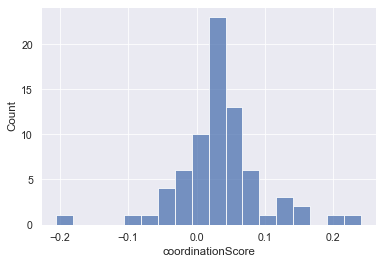

In [10]:
everyone_to_everyone = coord.summarize(corpus, everyone, everyone)
scores_ete = []
for spkr, score in everyone_to_everyone.averages_by_speaker().items():
    scores_ete.append([spkr.id, score])
cS = pd.DataFrame(scores_ete)
cS.columns = ["person_id","coordinationScore"]
sns.histplot(cS.coordinationScore);

In [36]:
cS.to_csv(f'{path}results/coordination_scores.csv')

### Pairwise Coordination

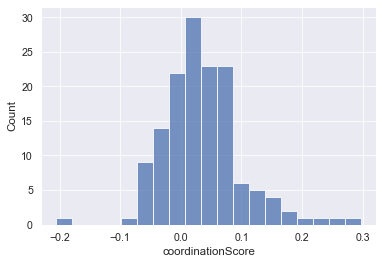

In [11]:
# default: target_thresh = 3, the rest = 0
pairwise_coord = coord.pairwise_scores(corpus, pairs = corpus.speaking_pairs())
scores_pairwise = []
for (speaker, target), score in pairwise_coord.items():
    scores_pairwise.append([speaker.id, target.id, sum(score.values())/len(score.values())])
pcS = pd.DataFrame(scores_pairwise)
pcS.columns = ["speaker", "target", "coordinationScore"]
sns.histplot(pcS.coordinationScore);

In [41]:
pcS.to_csv(f'{path}results/pairwise_coordination_scores.csv')

## Separtaing by ConvoType

### Introduction Conversations

In [12]:
corpus_intro = corpus.filter_utterances_by(lambda u: u.conversation_id.startswith("intro"))
coord_intro = Coordination()
coord_intro.fit(corpus_intro)
coord_intro.transform(corpus_intro);

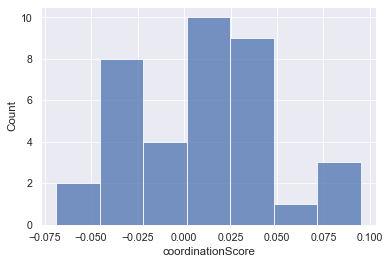

In [13]:
everyone_to_everyone = coord_intro.summarize(corpus_intro, everyone, everyone)
scores_ete = []
for spkr, score in everyone_to_everyone.averages_by_speaker().items():
    scores_ete.append([spkr.id, score])
intor_sC = pd.DataFrame(scores_ete)
intor_sC.columns = ["person_id","coordinationScore"]
sns.histplot(intor_sC.coordinationScore);

### Negotiation Conversations

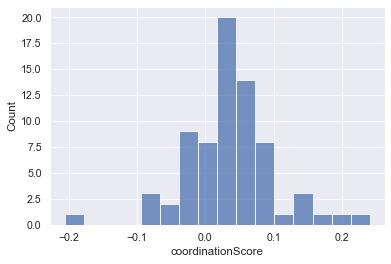

In [17]:
corpus_nego = corpus.filter_utterances_by(lambda u: u.conversation_id.startswith("nego"))
coord_nego = Coordination()
coord_nego.fit(corpus_nego)
coord_nego.transform(corpus_nego)
everyone_to_everyone = coord_nego.summarize(corpus_nego, everyone, everyone)
scores_ete = []
for spkr, score in everyone_to_everyone.averages_by_speaker().items():
    scores_ete.append([spkr.id, score])
nego_sC = pd.DataFrame(scores_ete)
nego_sC.columns = ["person_id","coordinationScore"]
sns.histplot(nego_sC.coordinationScore);

In [18]:
corpus_nego.print_summary_stats()

Number of Speakers: 72
Number of Utterances: 2949
Number of Conversations: 71


#### Histograms of length by convoType

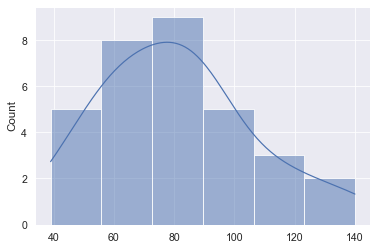

In [20]:
# Intro
length = [len(convo._utterance_ids) for convo in corpus_intro.iter_conversations()]
sns.histplot(length,kde=True);

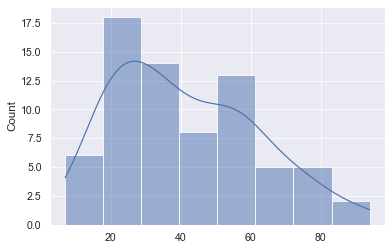

In [22]:
# Nego
length = [len(convo._utterance_ids) for convo in corpus_nego.iter_conversations()]
sns.histplot(length,kde=True);